In [1]:
import numpy as np
import pandas as pd
import feather


In [2]:
train = feather.read_dataframe("../data/input/tr_best.feather")
test = feather.read_dataframe("../data/input/te_best.feather")
score = train.Score
del test["index"], train["Score"],train["index"], test["ID"]

In [4]:

import json
import numpy as np
with open('../configs/Kbest_FE.json') as f:
    df = json.load(f)
fl_score = np.array(df["kbest_feature"]["float"])
int_score = np.array(df["kbest_feature"]["int"])
cate_score = np.array(df["kbest_feature"]["cate"])

In [24]:
data = train.append(test)

In [26]:
c = [i for i in train.columns if len(data[i].unique()) != 2]

In [27]:
num_tr = train[c]
num_te = test[c]

In [28]:
def yao_transform(data):
    new_yao = pd.DataFrame()
    for i in data.columns:
        new_yao[f"{i}_yao"] = data[i].map(lambda x : -np.log1p(-x) if x < 0 else np.log1p(x))
    return new_yao
yao_tr = yao_transform(num_tr)
yao_te = yao_transform(num_te)

In [38]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

yao_std_tr = std.fit_transform(num_tr)
yao_std_te= std.transform(num_te)

In [30]:
cate_c = []
for i in train.columns:
    if i not in num_tr.columns:
        cate_c.append(i)
cate_tr = train[cate_c]
cate_te = test[cate_c]

In [39]:
tr = pd.DataFrame(yao_std_tr,columns=c)
te = pd.DataFrame(yao_std_te,columns=c)


In [40]:
def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]

    return pd.DataFrame(add_df,columns=add_columns)
    
tr = df_concat([tr,cate_tr])
te = df_concat([te,cate_te])

In [48]:
train = feather.read_dataframe("../data/input/train_umap.feather")
test = feather.read_dataframe("../data/input/test_umap.feather")

In [49]:
del train["Score"]

In [24]:
a.strftime('%Y/%m/%d/%H:%M')

'2019/10/04/13:49'

In [19]:
a.date()

datetime.date(2019, 10, 4)

In [51]:
train.to_feather("../data/input/stack/train_umap.feather")
test.to_feather("../data/input/stack/test_umap.feather")


In [64]:
tr_pca = feather.read_dataframe("../data/input/tr_best_pca__.feather")
te_pca = feather.read_dataframe("../data/input/te_best_pca__.feather")

In [66]:
tr_pca = tr_pca.loc[:,'n_PCA_1':'n_PCA_18']

In [67]:
tr_pca = df_concat([train,tr_pca])
te_pca = df_concat([test,te_pca])

In [68]:
tr_pca.to_feather("../data/input/stack/tr_pca.feather")
te_pca.to_feather("../data/input/stack/te_pca.feather")

In [77]:
pca_tr = feather.read_dataframe("../data/input/stack/tr_pca.feather")
pca_te = feather.read_dataframe("data/input/stack/te_pca.feather")
tsne_tr = feather.read_dataframe("data/input/stack/tr_tSNE.feather")
tsne_te = feather.read_dataframe("data/input/stack/te_tSNE.feather")

ArrowIOError: Failed to open local file 'data/input/stack/te_pca.feather', error: No such file or directory

In [108]:
all_ = feather.read_dataframe("../features/add_Alltype.feather")


In [553]:

bins_stack = pd.DataFrame()
for i in stack.columns:
    bins_stack[f"bins_{i}"] = pd.cut(stack[i],bins=15,labels=False)

In [554]:
def freq_encoing(data):
    new = pd.DataFrame()
    l = len(data)
    for i in data.columns:
        tmp = data.groupby(i).size()
        tmp = tmp/l
        new[f"{i}_FreqEnc"] = data[i].map(tmp)
        
    return new
freq_stack= freq_encoing(bins_stack)

In [111]:
i = 27463//2
all_tr, all_te = all_.iloc[:i,],all_.iloc[i:,:]

In [118]:
for i in all_tr.columns:
    if len(all_tr[i].unique()) == 1:
        del all_tr[i],all_te[i]

In [122]:
tr = df_concat([train,all_tr,freq_all_tr])
te = df_concat([test,all_te,freq_all_te])

In [123]:
tr["Score"] = score
tr.to_feather("../data/input/tr_statsfreq.feather")
te.to_feather("../data/input/te_statsfreq.feather")

In [125]:
import json
del tr["Score"]
ff = tr.columns.values.tolist()
features = {"features":ff, "target_name":"Score"}

with open("../configs/config_kbest_statsfreq.json","w") as f:
    json.dump(features,f)


In [25]:
import feather

In [26]:
tr

NameError: name 'tr' is not defined

In [34]:
train.to_feather("../test.feather")

In [35]:
train = feather.read_dataframe("../data/input/tr_best_allst.feather")
test = feather.read_dataframe("../data/input/te_best_allst.feather")

In [37]:
s = train["Score"]
del train["index"],test["index"],train["Score"]

In [39]:
#int drop
from tqdm import tqdm
train,test = train,test
#分散＝０
constant = []
for col in train.columns:
    if col != "Score" or col != "ID":
        if train[col].std() == 0:
            constant.append(col)
train1 = train.drop(columns=constant,axis=1)
test1 = test.drop(columns=constant,axis=1)


            
#ダブり
aa = []
for i in tqdm(train1.columns):
    if train1[i].dtype != "object":
        aa.append(i)
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)
int_train,int_test = train1,test1

100%|██████████| 527/527 [00:00<00:00, 17066.08it/s]


In [40]:
train.shape

(13731, 536)

In [45]:
int_train.to_feather("../data/input/stack/tr_allst.feather")
int_test.to_feather("../data/input/stack/te_allst.feather")

In [44]:
del int_test["ID"]

In [46]:
train = feather.read_dataframe("../data/input/stack/tr_pca.feather")
test = feather.read_dataframe("../data/input/stack/te_pca.feather")

In [68]:
a = feather.read_dataframe("/Users/kenji/Desktop/stack_feature1/train/train_KNeighborsRegressor10-04-05:43.feather")

In [291]:
corr = set()
corr_matrix =stack.corr()
for i in tqdm(range(len(corr_matrix.columns))):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.95:
            corr.add(corr_matrix.columns[i])
stack.drop(corr,axis=1,inplace=True)
#test1.drop(corr,axis=1,inplace=True)

100%|██████████| 29/29 [00:00<00:00, 2611.93it/s]


In [186]:
from scipy.stats import ks_2samp
from tqdm import tqdm
list_p_value =[]

for i in tqdm(stack_tr.columns):
    list_p_value.append(ks_2samp(stack_te[i] , stack_tr[i])[1])

Se = pd.Series(list_p_value, index = stack_tr.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)

100%|██████████| 33/33 [00:00<00:00, 218.59it/s]


In [385]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

def PCA_feature(data,typ):

    n_components = 0
    pca = PCA(n_components=n_components)
    X_train,X_test = data.iloc[:13731,:],data.iloc[13731:,:]
    x_train_projected = pca.fit_transform(X_train)
    x_test_projected = pca.transform(X_test)
    new1 = pd.DataFrame()
    new2 = pd.DataFrame()
    for npca in range(0, n_components):
        new1[f'{typ}frq_PCA_'+str(npca+1)] = x_train_projected[:, npca]
        new2[f'{typ}frq_PCA_'+str(npca+1)] = x_test_projected[:, npca]
    new = new1.append(new2)
    return new
pca = PCA_feature(h_tr.append(h_te),"hi")

0.8820839250421293

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


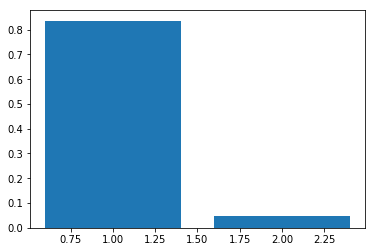

In [383]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(stack_tr)
import matplotlib.pyplot as plt
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
pca.explained_variance_ratio_.sum()

In [4]:
#dae_data =  feather.read_dataframe("../features/DAE_p2.feather")
#dae_data =  feather.read_dataframe("../features/DAE_p2_pca.feather")
dae_data = feather.read_dataframe("../features/dae_tsne.feather")
daeumap_data = feather.read_dataframe("../features/DAE_umap.feather")

In [123]:
st_all = feather.read_dataframe("../features/add_Alltype.feather")

In [124]:
dae_tr = feather.read_dataframe("../data/input/train_daetsne.feather")
dae_te = feather.read_dataframe("../data/input/test_daetsne.feather")

In [275]:
h_tr = feather.read_dataframe("../data/input/stack/train_hierarchal.feather")
h_te = feather.read_dataframe("../data/input/stack/test_hierarchal.feather")

In [276]:
h_tr = h_tr.loc[:,"col10_h_FreqEnc":]
h_te = h_te.loc[:,"col10_h_FreqEnc":]

In [36]:
frq_tr = feather.read_dataframe("../data/input/tr_best_prob.feather")
frq_te = feather.read_dataframe("../data/input/te_best_prob.feather")
frq = frq_tr.append(frq_te)
fl_pca = frq.loc[:,"fl_PCA_1":"fl_PCA_14"]
int_pca  =frq.loc[:,"int_PCA_1":"int_PCA_11"]
cate_pca = frq.loc[:,"cate_PCA_1":"cate_PCA_30"]


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [643]:
raw_umap = feather.read_dataframe("../features/raw_umap15.feather")

In [1]:
import pandas as pd
import numpy as np
import feather
import os
path1 = "../features/stack_feature_layer2/train/"
path2 = "../features/stack_feature_layer2/test/"

def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]

    return pd.DataFrame(add_df,columns=add_columns)
def get_stack(path):
    files = os.listdir(path)
    print(files)
    if '.DS_Store' in files:
        del files[files.index('.DS_Store')]
    stack = pd.DataFrame()
    for i in files:
        tmp = feather.read_dataframe(path + i)
        stack[tmp.columns] = tmp
    return stack
stack_tr = get_stack(path1)
stack_te = get_stack(path2)
stack = stack_tr.append(stack_te)

['train_MLPbags.feather', 'train_knn512.feather', '.DS_Store', 'train_ELbags.feather', 'train_knn128.feather', 'train_knn256.feather', 'train_knn64.feather', 'train_EXbags.feather', 'train_RFbags.feather', 'train_knn1024.feather', 'train_LightGBMmeta.feather']
['test_knn1024.feather', '.DS_Store', 'test_LightGBMmeta.feather', 'test_knn512.feather', 'test_knn256.feather', 'test_knn128.feather', 'test_ELbags.feather', 'test_RFbags.feather', 'test_EXbags.feather', 'test_knn64.feather', 'test_MLPbags.feather']


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [542]:
from tqdm import tqdm
def interact(data):
    new = pd.DataFrame()
    c = data.columns
    for i in tqdm(range(len(data.columns))):
        for j in range(i):
            #new[f"plus_{c[i]}_{c[j]}"] = data[c[i]] + data[c[j]]
            #new[f"minus_{c[i]}_{c[j]}"] = data[c[i]] - data[c[j]]
            new[f"dot{c[i]}_{c[j]}"] = data[c[i]] * data[c[j]]
            new[f"mod{c[i]}_{c[j]}"] = data[c[i]] / data[c[j]]

    return new
interact_feature = interact(stack)

100%|██████████| 26/26 [00:01<00:00, 11.21it/s]


In [517]:
stats = pd.DataFrame()
stats["mean"] = stack.mean(axis =1 )
stats["median"] = stack.median(axis =1 )
stats["max"] = stack.max(axis =1 )
stats["min"] = stack.min(axis =1 )
stats["std"] = stack.std(axis =1 )



In [566]:
new = pd.DataFrame()
new["x<0.5"] = np.where(freq_stack >= 0.5,1,0).sum(axis = 1)
new["x>0.5"] = np.where(freq_stack < 0.5,1,0).sum(axis = 1)

In [650]:
#stack_pca = df_concat([dae_tr.append(dae_te),fl_pca,int_pca,cate_pca])a
#stack_pca = df_concat([stack,interact_feature,dae_data,fl_pca,int_pca,cate_pca,new])
stack_pca = df_concat([stack,raw_umap])
#stack_pca = df_concat([stack,yy])

In [476]:
from tqdm import tqdm
new = pd.DataFrame()
for i in tqdm(stack_pca.columns):
    new[i] = stack_pca[i].map(lambda x : np.log1p(x) if x > 0 else -np.log1p(-x))


100%|██████████| 294/294 [00:11<00:00, 24.87it/s]

In [3]:
stack_pca = stack
i = 27463//2
tr,te = stack_pca.iloc[:i,:],stack_pca.iloc[i:,:]

In [374]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
tr = std.fit_transform(tr.values)
te = std.transform(te.values)

In [139]:
tr = pd.DataFrame(tr,columns=stack_pca.columns)
te = pd.DataFrame(te,columns=stack_pca.columns)

In [4]:
tr.reset_index(inplace=True)
te.reset_index(inplace=True)

In [5]:
del tr["index"],te["index"]

In [6]:
tr.to_feather("../data/input/layer3//train_stack3_raw.feather")
te.to_feather("../data/input/layer3/test_stack3_raw.feather")

In [88]:
#st = pd.read_csv("../data/output/submit_0.3409.csv",header = None)
el = pd.read_csv("../data/output/stackElasticNet.csv",header = None)
mlp1 = pd.read_csv("../data/output/stackMLP1_submit.csv",header = None)
mlp2 = pd.read_csv("../data/output/stackMLP2_submit.csv",header = None)
br = pd.read_csv("../data/output/stackBayesianRigde_submit.csv",header = None)
#lgb1 = pd.read_csv("../data/output/stackLGBMr2_submit.csv",header = None)
#lgb2 = pd.read_csv("../data/output/stackLGBM6SELoss_submit.csv",header = None)

In [57]:
import pandas as pd
#lgb4 = pd.read_csv("../data/output/stackLGBM4_submit.csv",header = None)
lgb6 = pd.read_csv("../data/output/stackLGBM_submit.csv",header = None)

In [12]:
br = pd.read_csv("../data/output/stackBayesianRigde_submit.csv",header = None)

In [2]:
import pandas as pd
mlp1 = pd.read_csv("../data/output/stackMLP_k10_submit.csv",header = None)
mlp2 = pd.read_csv("../data/output/stackMLP_4_submit.csv",header = None)
mlp3 = pd.read_csv("../data/output/stackMLP_5_submit.csv",header = None)
mlp4 = pd.read_csv("../data/output/stackMLP_6_submit.csv",header = None)

lgb5 = pd.read_csv("../data/output/stackLGBM_r2_submit.csv",header = None)
el = pd.read_csv("../data/output/stackEL_submit.csv",header = None)

lgb1 = pd.read_csv("../data/output/submit_0.454.csv",header = None)
lgb2 = pd.read_csv("../data/output/stackLGBM_r2_k10_submit.csv",header = None)
lgb3 = pd.read_csv("../data/output/stackLGBM_SELoss_k10_submit.csv",header = None)
lgb4 = pd.read_csv("../data/output/submit_0.3409.csv",header = None) 

In [498]:
el = pd.read_csv("../data/output/stack_output/EL_stack_raw_submit.csv",header = None) 
lgb1 = pd.read_csv("../data/output/stack_output_layer3/LGB_stack_raw+.csv",header = None) 
lgb2 = pd.read_csv("../data/output/stack_output_layer3/LGB_stack_raw.csv",header = None) 
mlp1= pd.read_csv("../data/output/stack_output/MLP4_stack_raw_submit.csv",header = None) 
mlp2= pd.read_csv("../data/output/stack_output/MLP3_stack_raw_submit.csv",header = None) 

In [29]:
lgb = pd.read_csv("../data/output/stack_output_layer3/LGBbags_stack_raw.csv",header = None) 
el = pd.read_csv("../data/output/stack_output/ELbags_stack_raw_submit.csv",header = None) 
mlp= pd.read_csv("../data/output/stack_output/MLPbags_stack_raw_submit.csv",header = None) 
xgb= pd.read_csv("../data/output/XGBbags_stack_submit.csv",header = None) 

In [16]:
mlp =feather.read_dataframe("../features/stack_feature_layer2/test/test_MLPbags.feather") 
lgb = feather.read_dataframe("../features/stack_feature_layer2/test/test_LightGBMmeta.feather") 
rf = feather.read_dataframe("../features/stack_feature_layer2/test/test_RFbags.feather") 
el = feather.read_dataframe("../features/stack_feature_layer2/test/test_ELbags.feather") 
ex = feather.read_dataframe("../features/stack_feature_layer2/test/test_EXbags.feather")
knn = feather.read_dataframe("../features/stack_feature_layer2/test/test_knn512.feather")

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


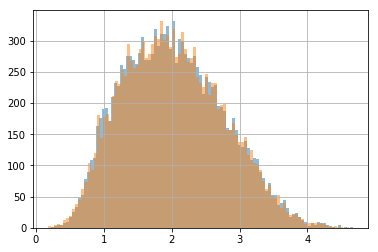

In [43]:
#mlp1.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp2.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp2.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp3.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp4.iloc[:,1].hist(bins = 100,alpha = 0.5)
#lgb1.iloc[:,1].hist(bins = 100,alpha = 0.5)
import matplotlib.pyplot as plt
#mlpbag.iloc[:,1].hist(bins = 100,alpha = 0.5)
#lgb.iloc[:,1].hist(bins = 100,alpha = 0.5)
#xgb.iloc[:,1].hist(bins = 100,alpha = 0.5)
#a.iloc[:,1].hist(bins = 100,alpha = 0.5)
#el.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp2.iloc[:,1].hist(bins = 100,alpha = 0.5)
mlp.iloc[:,1].hist(bins = 100,alpha = 0.5)
#mlp2.iloc[:,1].hist(bins = 100,alpha = 0.5)
#st.iloc[:,1].hist(bins = 100,alpha = 0.5)
t.hist(bins = 100,alpha = 0.5)


In [44]:
t = ((lgb.iloc[:,1]**0.75 * xgb.iloc[:,1]**0.25)*0.4 + el.iloc[:,1]*0.6)*0.4 + mlp.iloc[:,1] * 0.6

In [746]:
t = (lgb1.iloc[:,1]*0.2+lgb2.iloc[:,1]*0.8)*0.38 + el.iloc[:,1] * 0.62
tt = (mlp1.iloc[:,1]*0.2+mlp2.iloc[:,1]*0.8)*0.65 + t *0.35




In [66]:
mlp = mlp1.iloc[:,1]*0.5+mlp2.iloc[:,1]*0.5
lgb = lgb1.iloc[:,1]*0.75 + lgb2.iloc[:,1]*0.25
a = el.iloc[:,1]*0.75 + (lgb*0.35 + mlp*0.65)*0.25




In [252]:
a = (mlp1.iloc[:,1]*0.2+el.iloc[:,1]*0.8)*0.35 + (mlp2.iloc[:,1]*0.65 +  br.iloc[:,1]*0.35)*0.65

In [277]:
aa =ss.iloc[:,1] * 0.75 + (s.iloc[:,1]*0.55 + a * 0.45)*0.25

In [55]:
a = 0.25*(lgb2.iloc[:,1] * 0.25 + lgb3.iloc[:,1]*0.75 )+lgb4.iloc[:,1]*0.75

In [739]:
st= pd.read_csv("../data/output/stack_output/submit_22.csv",header = None)

In [266]:
a = (lgb2.iloc[:,1]**0.75 * mlp2.iloc[:,1]**0.25)*0.75 +(mlp3.iloc[:,1]**0.85 * lgb1.iloc[:,1]**0.15) * 0.25





In [45]:
sub = pd.read_csv("../data/input/sample_submit.csv",header = None)

In [46]:
sub.iloc[:,1] = t

In [47]:
sub.to_csv("../data/output/stack_output/submit_26.csv",index = None,header = None)

In [65]:
ens = pd.read_csv("../data/output/ensmble/submit_ensmble4.csv",header = None)
e = pd.read_csv("../data/output/stack_output/submit_6.csv",header = None)

In [66]:
a = ens.iloc[:,1] * 0.8 + e.iloc[:,1] * 0.2

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


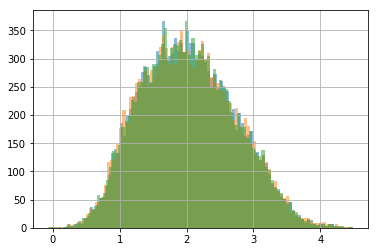

In [59]:
ens.iloc[:,1].hist(bins = 100,alpha = 0.5)

e.iloc[:,1].hist(bins = 100,alpha = 0.5)
#aa.hist(bins = 100,alpha = 0.5)
a.hist(bins = 100,alpha = 0.5)

#a.hist(bins = 100,alpha = 0.5)
#np.sum(ens.iloc[:,1] - a)


In [45]:
sum(a<0)

1

In [13]:
from scipy import stats
scipy.stats.kurtosis(x(score)),ens.iloc[:,1].kurtosis()

NameError: name 'scipy' is not defined

In [42]:
from sklearn.metrics import r2_score
r2_score(ens.iloc[:,1].values,a.values)

0.9995585257158449

In [189]:
st = pd.read_csv("../data/output/submit_0.3409.csv")

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


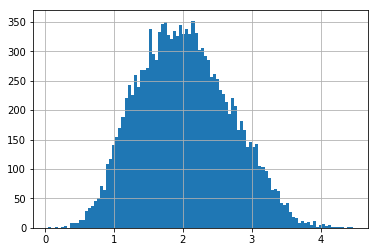

In [7]:
st.iloc[:,1].hist(bins = 100)

In [158]:
sum(aa<0)

1

In [160]:
ss = pd.read_csv("../data/output/submit_0.6194.csv",header = None)
s = pd.read_csv("../data/output/submit_0.3409.csv",header = None)
ssss = pd.read_csv("../data/output/submit_0.3247.csv",header = None)
lgbbag = pd.read_csv("../data/output/stackLGBMbag_r2_submit.csv",header = None) 
mlpbag= pd.read_csv("../data/output/stackGP_submit.csv",header = None) 

In [229]:
lgbbag = pd.read_csv("../data/output/stackLGBMbag_r2_submit.csv",header = None) 
mlpbag= feather.read_dataframe("../features/stack_feature3/test/test_LightGBMRMSLEpca.feather")
mlpbag1 = feather.read_dataframe("../features/stack_feature3/train/train_LightGBMRMSLEpca.feather")

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


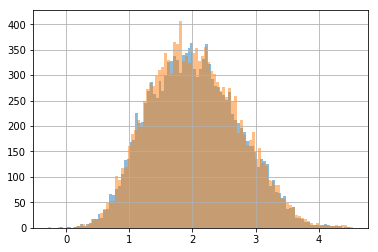

In [234]:
mlpbag.iloc[:,0].hist(bins = 100,alpha = 0.5)
(mlpbag1.iloc[:,0]-1).hist(bins = 100,alpha = 0.5)
#lgbbag.iloc[:,1].hist(bins = 100,alpha = 0.5)
#score.hist(bins = 100,alpha = 0.5)
#ssss.iloc[:,1].hist(bins = 100,alpha = 0.5)

In [220]:
a = (s.iloc[:,1]*0.8 +lgbbag.iloc[:,1]* 0.2)*0.55+( ss.iloc[:,1]*0.45+mlpbag.iloc[:,1]*0.55)*0.45

In [9]:
ss = pd.read_csv("../data/output/submit_0.0597.csv",header = None)
s = pd.read_csv("../data/output/stackLGBMKL_submit.csv",header = None)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


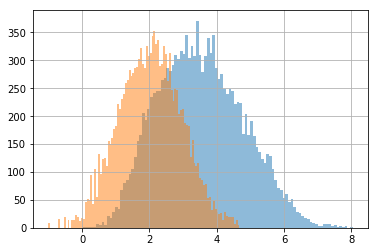

In [97]:
#sss.iloc[:,0].hist(bins = 100,alpha = 0.5

#mlp.iloc[:,1].hist(bins = 100,alpha = 0.5)
score.hist(bins = 100,alpha = 0.5)

In [14]:
sss = pd.read_csv("../tr_pred.csv",header = None)

In [366]:
(65*2 +63*6 + 53 + 58)/10

61.9

In [536]:
a = [0.621552744401713,
0.6591999807864688,
0.6435474802782722,
0.6389080029607141,
0.6518114420727786,
0.6038402617736054,
0.6321062441808667,
0.6536861885032905,
0.6222967061412867,
0.6277232749002624]

In [790]:
aa = [0.619190798770052,
0.6426195379628682,
0.637611291631494,
0.6570766145820095,
0.6504309223119322,
0.6013443873788056,
0.6313598715106278,
0.6442152142551774,
0.6174490888945198,
0.6236648246794458]

In [791]:
aaa = [0.6462995519404978,
0.645756356541765,
0.6283996038183188,
0.6646703118631541,
0.6569596023910025,
0.6072360269007067,
0.6387670486843752,
0.6530108528791281,
0.623402743929826,
0.6316650976999492]

In [792]:
np.mean(a),np.mean(aa),np.mean(aaa)

(0    13748.110399
 1        2.021957
 dtype: float64, 0.6324962551976933, 0.6396167196648723)

In [ ]:
import sklearn.base
from  bhtsne import tsne
import numpy as np

y = tsne(stack.astype("float64"),rand_seed=1103,dimensions=3,perplexity=30)

In [392]:
yy = pd.DataFrame(y, columns=[f"{i}_tsne" for i in range(3)])

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


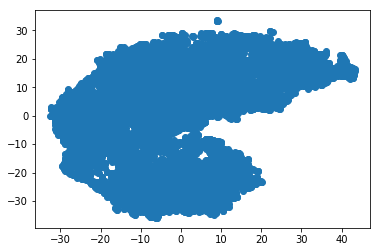

In [394]:
plt.scatter(y[:,0],y[:,1])

In [21]:
a=feather.read_dataframe("../features/stack_feature4/test/test_ElasticNet10-10-16:28.feather")
aa=feather.read_dataframe("../features/stack_feature4/test/test_LightGBMRMSLEumap.feather")